# Test evaluate method of SpiralArmsPotential
(by plotting the potential with various parameters)

Jack Hong

In [2]:
from galpy.potential import SpiralArmsPotential as spiral
import matplotlib.pyplot as plt
import numpy as np

## Default values
(N=2, alpha=0.2, r_ref=1, phi_ref=0, Rs=0.5, H=0.5, Cs=[1], omega=0)

In [3]:
def plot_spiral(spiral_pot, t=0):
    ax = spiral_pot.plot(t=t, xy=True, rmin=-2, rmax=2, zmin=-2, zmax=2, ncontours=3, nrs=50)
    ax.set_cmap('coolwarm')
    ax.colorbar = plt.colorbar(ax)
    ax.__getattribute__('axes').set_ylim([2, -2])

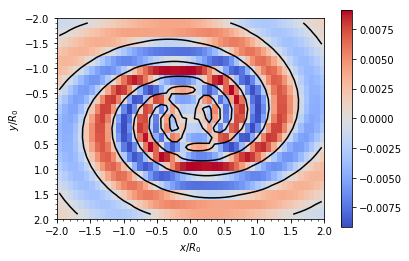

In [4]:
spiral_pot = spiral(omega=2*np.pi)
plot_spiral(spiral_pot, 1.5)
plt.show()

## Varying the reference angle $\phi_p$

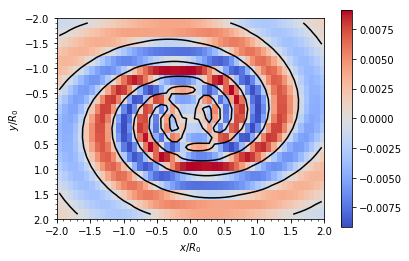

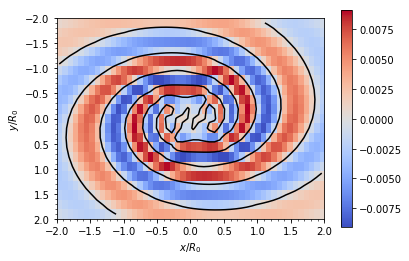

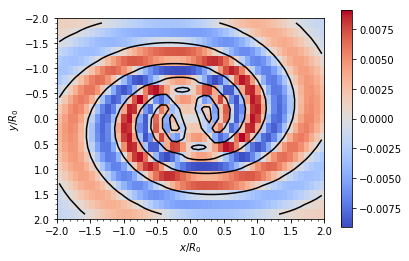

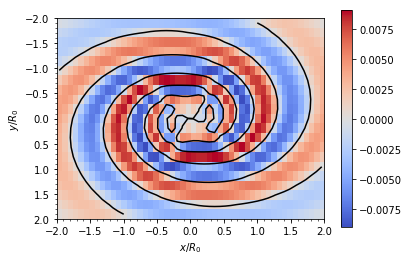

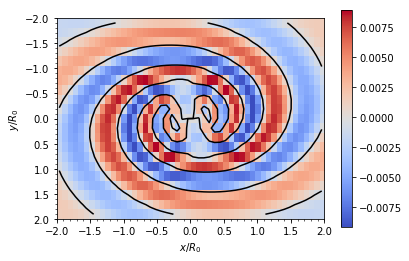

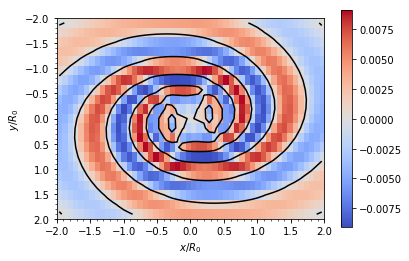

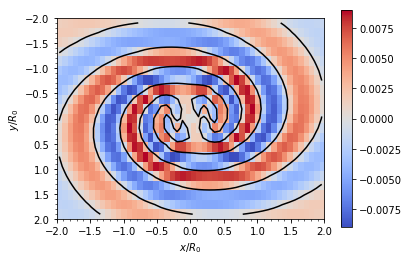

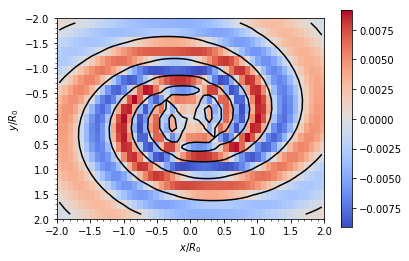

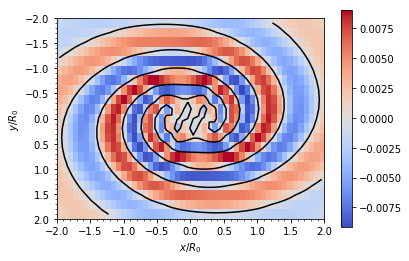

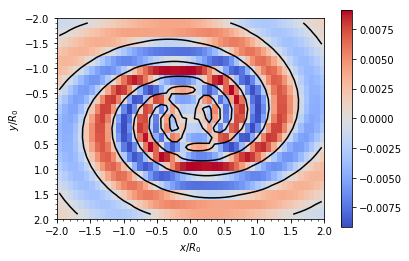

In [5]:
for phi_ref in np.linspace(0, 2*np.pi, 10):
    plot_spiral(spiral(phi_ref = phi_ref))
    
plt.show()

## Varying the pitch angle $\alpha$

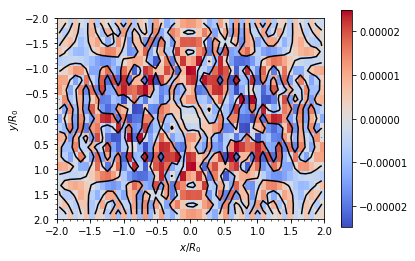

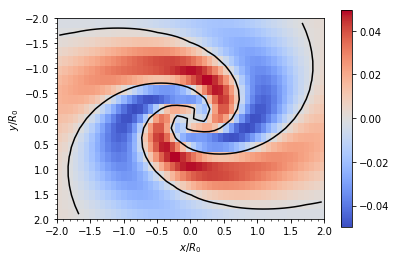

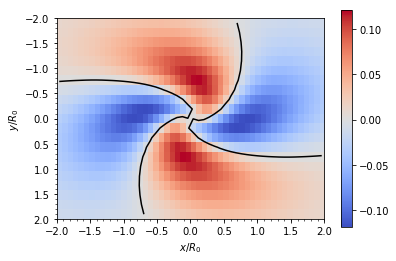

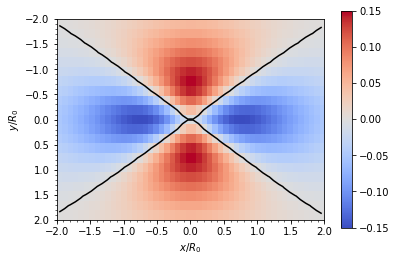

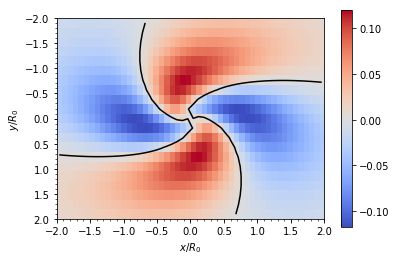

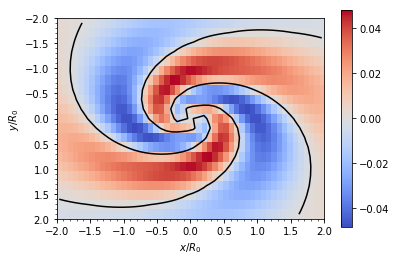

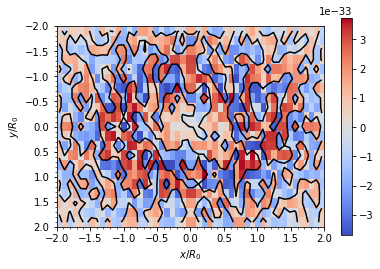

In [6]:
for alpha in np.linspace(0.01, np.pi, 7):
    plot_spiral(spiral(alpha=alpha))

plt.show()

## Varying the number of arms $N$

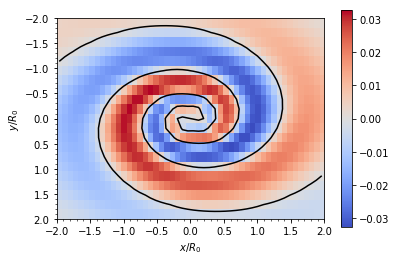

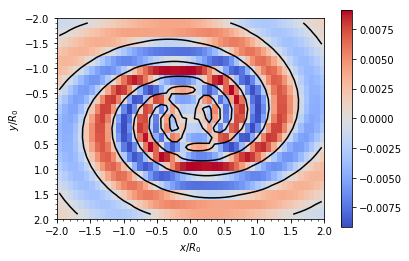

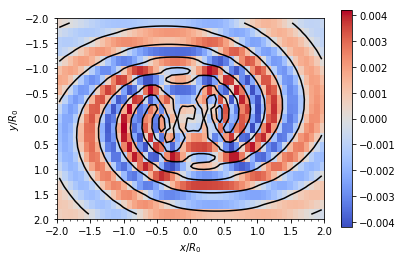

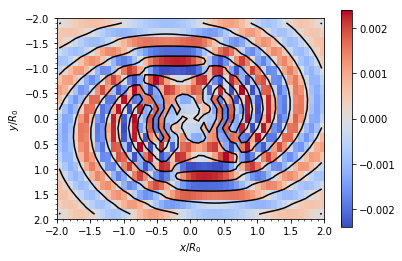

In [7]:
for N in range(1, 5):
    plot_spiral(spiral(N=N))
    
plt.show()

## Varying the radial scale length $R_s$

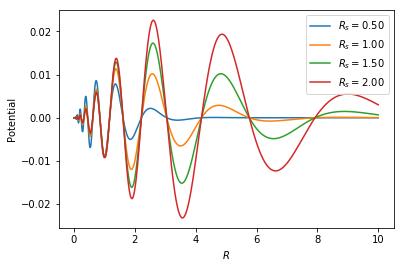

In [8]:
R = np.linspace(0, 10, 1000)
for Rs in np.linspace(0.5, 2, 4):
    spiral_pot = spiral(Rs=Rs)
    pots = np.zeros(R.size)
    
    for k in np.arange(R.size):
        pots[k] = spiral_pot(R[k], 0)
    
    plt.plot(R, pots, label="$R_s = {:.2f}$".format(Rs))  # (R, z, phi) = (R, 0, 0)
    
plt.xlabel("$R$")
plt.ylabel("Potential")
plt.legend()
plt.show()

## Varying the scale height $H$

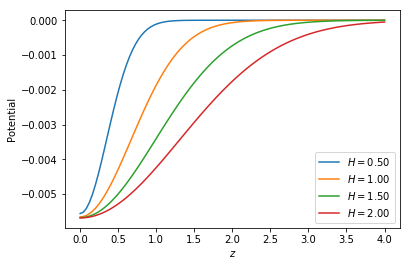

In [9]:
z = np.linspace(0, 4, 100)

for H in np.arange(0.5, 2.5, 0.5):
    spiral_pot = spiral(H=H)
    pots = np.zeros(z.size)
    
    for k in np.arange(z.size):
        pots[k] = spiral_pot(0.5, z[k])

    
    plt.plot(z, pots, label="$H = {:.2f}$".format(H))  # (R, z, phi) = (1, z, 0)

plt.xlabel("$z$")
plt.ylabel("Potential")    
plt.legend()
plt.show()

## Vary time

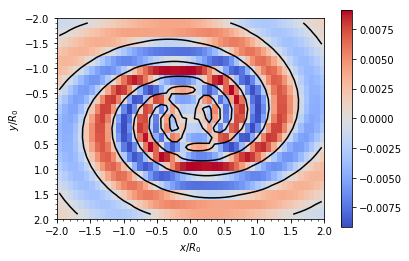

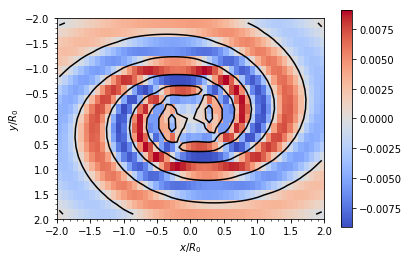

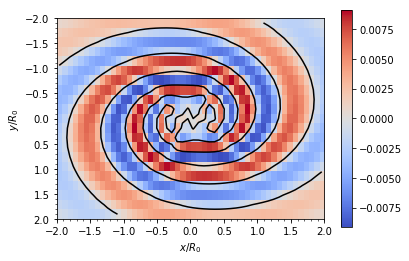

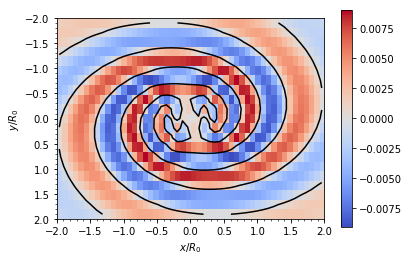

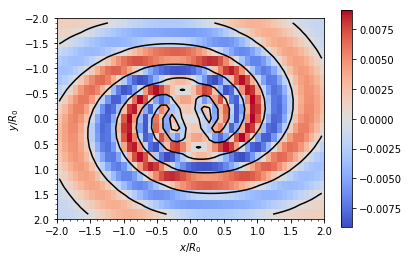

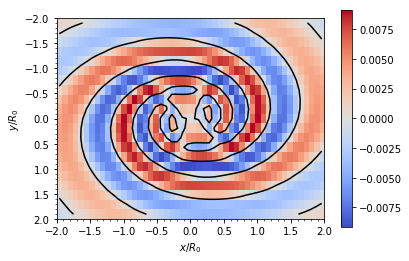

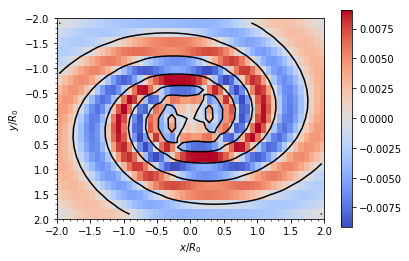

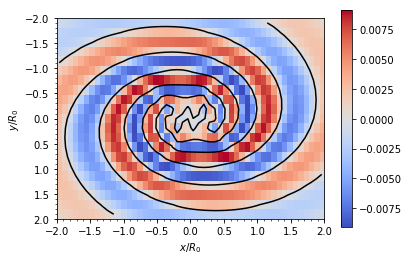

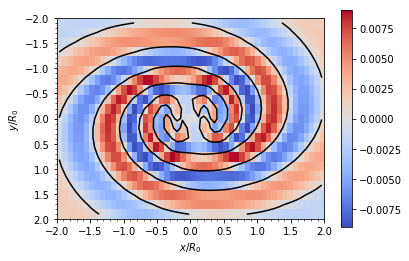

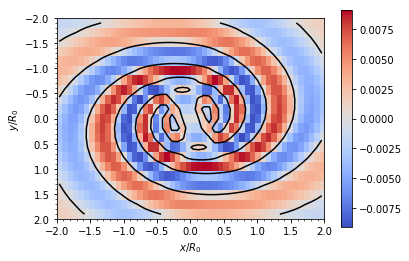

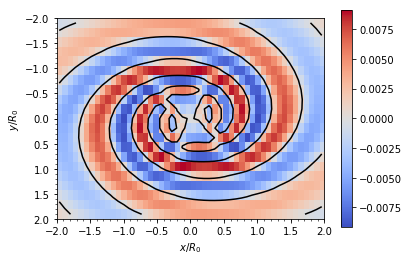

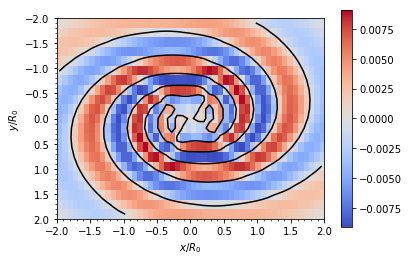

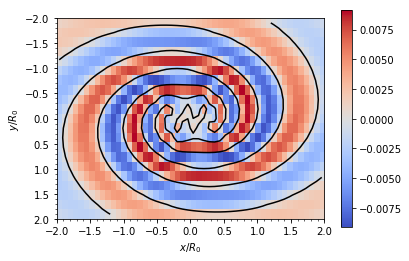

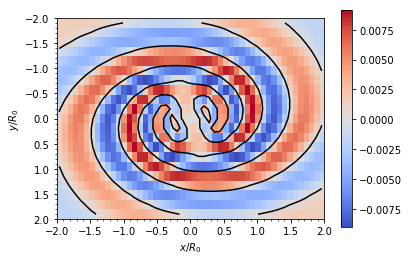

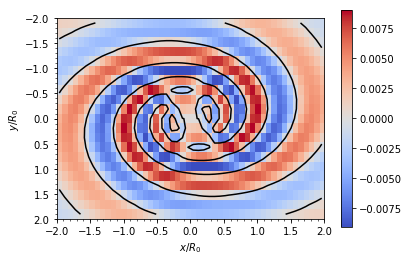

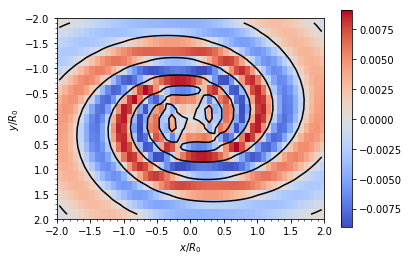

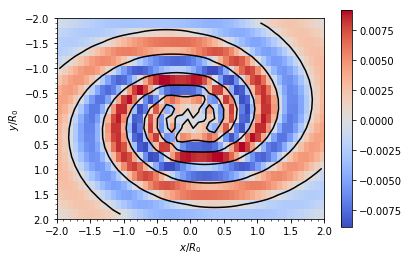

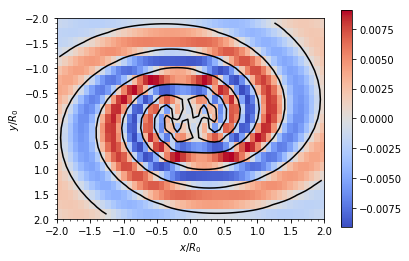

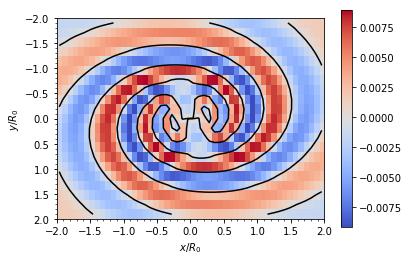

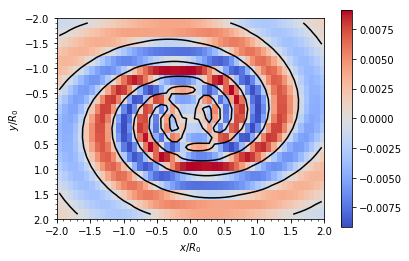

In [10]:
sp=spiral(omega=2*np.pi)
for t in np.linspace(0, 1, 20):
    plot_spiral(sp, t=t)
    
plt.show()

In [11]:
plot_spiral(sp, 0)
plot_spiral(sp, 500)

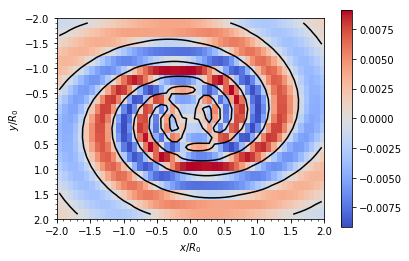

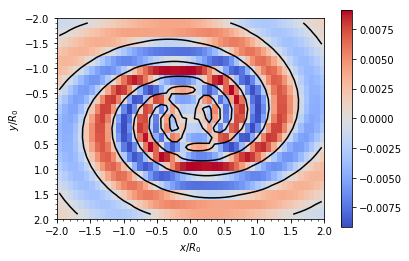

In [12]:
plt.show()

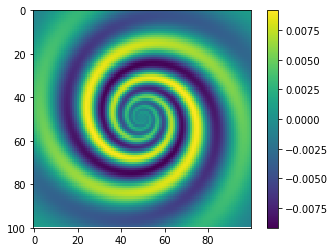

In [13]:
from galpy.util import bovy_coords
sp = spiral()
n = 100
xs = np.linspace(-2.0, 2.0, n)
ys = np.linspace(-2.0, 2.0, n)
X, Y = np.meshgrid(xs, ys)
potxy = np.zeros((n, n))

for ii in range(n):
    for jj in range(n):
        R, phi, z = bovy_coords.rect_to_cyl(xs[ii], ys[jj], 0)
        potxy[ii, jj] = sp(R, z, phi)

c = plt.imshow(potxy)
plt.colorbar(c)
plt.ylim([100, 0])
plt.show()